In [33]:
#Bruno Marra de Melo - 3029

import time
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import cluster

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:.2f}".format

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

In [3]:
def summaryNormalization(row):
    categories = {
        "Breezy": 0,
        "Breezy and Dry": 1,
        "Breezy and Foggy": 2,
        "Breezy and Mostly Cloudy": 3,
        "Breezy and Overcast": 4,
        "Breezy and Partly Cloudy": 5,
        "Clear": 6,
        "Dangerously Windy and Partly Cloudy": 7,
        "Drizzle": 8,
        "Dry": 9,
        "Dry and Mostly Cloudy": 10,
        "Dry and Partly Cloudy": 11,
        "Foggy": 12,
        "Humid and Mostly Cloudy": 13,
        "Humid and Overcast": 14,
        "Humid and Partly Cloudy": 15,
        "Light Rain": 16,
        "Mostly Cloudy": 17,
        "Overcast": 18,
        "Partly Cloudy": 19,
        "Rain": 20,
        "Windy": 21,
        "Windy and Dry": 22,
        "Windy and Foggy": 23,
        "Windy and Mostly Cloudy": 24,
        "Windy and Overcast": 25,
        "Windy and Partly Cloudy": 26
    }
    
    return categories[row['Summary']]

In [4]:
def precip(row):
    if(row['Precip Type'] == 'rain'): 
        return 0
    return 1

In [18]:
df = pd.read_csv('atividade8/weatherHistory.csv', index_col=False, squeeze=True)
df['Summary'] = df.apply (lambda row: summaryNormalization(row), axis=1)
df['Precip Type'] = df.apply (lambda row: precip(row), axis=1)
df = df.drop(["Daily Summary", "Formatted Date"], axis=1)

pd.unique(df['Precip Type'])

#%%

precip = df.dropna(subset=['Precip Type'])
pd.unique(precip['Precip Type'])

df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,19,0,9.47,7.39,0.89,14.12,251.00,15.83,0.00,1015.13
1,19,0,9.36,7.23,0.86,14.26,259.00,15.83,0.00,1015.63
2,17,0,9.38,9.38,0.89,3.93,204.00,14.96,0.00,1015.94
3,19,0,8.29,5.94,0.83,14.10,269.00,15.83,0.00,1016.41
4,17,0,8.76,6.98,0.83,11.04,259.00,15.83,0.00,1016.51


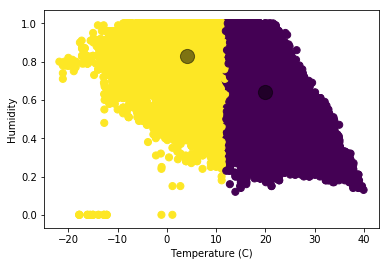

In [35]:
#Dados Kmeans
X = df[['Temperature (C)', 'Humidity']]

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(df['Temperature (C)'], df['Humidity'], c=y_kmeans, s=50, cmap='virHumidity	idis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")

plt.show()

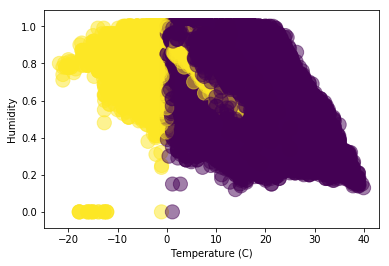

In [36]:
#Dados Real
precip = np.array([0,1])

plt.scatter(df['Temperature (C)'], df['Humidity'], c=precip[df['Precip Type']], s=200, alpha=0.5);

plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")

plt.show()

In [38]:
#Como podemos perceber entre os dois gráficos, a proximidade das classificações foi um pouco satisfatória. Podemos
#Fazer os mesmos testes para outros atributos e verificar se a silhueta melhora, apesar de já ser parcialmente
#satisfatória com quase 0.6

labels = kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.5864169851207162

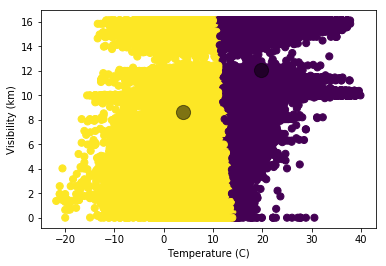

In [39]:
#Dados Kmeans
X = df[['Temperature (C)', 'Visibility (km)']]

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(df['Temperature (C)'], df['Visibility (km)'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.xlabel("Temperature (C)")
plt.ylabel("Visibility (km)")

plt.show()

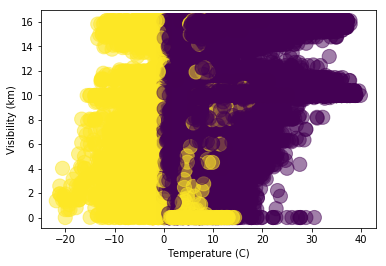

In [40]:
#Dados Real
precip = np.array([0,1])

plt.scatter(df['Temperature (C)'], df['Visibility (km)'], c=precip[df['Precip Type']], s=200, alpha=0.5);

plt.xlabel("Temperature (C)")
plt.ylabel("Visibility (km)")

plt.show()

In [41]:
#plotando então a silhueta para esses dois dados, podemos perceber que obtemos um resultado um pouco pior
#utilizando temperatura com visibilidade

labels = kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.49218740800794175

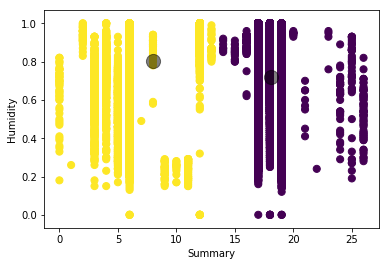

In [42]:
#Dados Kmeans
X = df[['Summary', 'Humidity']]

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(df['Summary'], df['Humidity'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.xlabel("Summary")
plt.ylabel("Humidity")

plt.show()

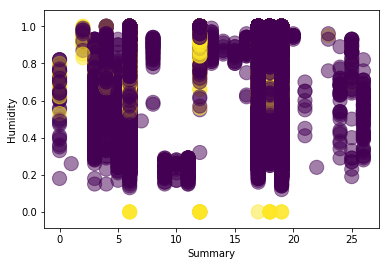

In [43]:
#Dados Real
precip = np.array([0,1])

plt.scatter(df['Summary'], df['Humidity'], c=precip[df['Precip Type']], s=200, alpha=0.5);

plt.xlabel("Summary")
plt.ylabel("Humidity")

plt.show()

In [44]:
#Apesar de visualmente os dados de resumo com o de humidade aparentemente possuirem pouca relação entre o real e
#o preditivo do kmeans, a silhueta deu um resultado muito próximo de 1, ou seja, aparentemente é uma ótima solução
#para o problema

labels = kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.836367505853703